<a href="https://colab.research.google.com/github/shinchacoffee/CIFAR10_practice/blob/main/CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision

In [2]:
random_seed=1
train_batch_size=100
test_batch_size=1000
n_epochs=1
torch.manual_seed(random_seed)

In [5]:
train_norm_load = torch.utils.data.DataLoader(
    torchvision.datasets.CIFAR10('/files/', train = True,
                                 transform = torchvision.transforms.Compose([
                                            torchvision.transforms.ToTensor()
                                            ]),
                                            download = True),
                            batch_size=train_batch_size, shuffle = True)

test_norm_load = torch.utils.data.DataLoader(
    torchvision.datasets.CIFAR10('/files/', train = False,
                                 transform = torchvision.transforms.Compose([
                                            torchvision.transforms.ToTensor()
                                            ]),
                                            download = True),
                            batch_size=train_batch_size, shuffle = True)

Files already downloaded and verified
Files already downloaded and verified


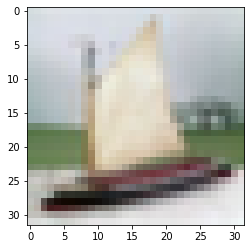

In [ ]:
import matplotlib.pyplot as plt
fig2=plt.figure()
for x,y in train_norm_load:
  xx=torch.movedim(x[0], (0,1,2), (2,0,1))
  plt.imshow(xx)
  break

In [6]:
RGB_sum = torch.zeros(3)
RGB_sum_sq = torch.zeros(3)
for x,y in train_norm_load:
  RGB_sum += torch.mean(x, dim=(0,2,3))#*x.shape[0]
  RGB_sum_sq += torch.mean(x*x, dim=(0,2,3))#*x.shape[0]
RGB_mean = RGB_sum / len(train_norm_load)
RGB_std  = (RGB_sum_sq / len(train_norm_load) - RGB_mean ** 2)**0.5
print(RGB_mean,RGB_std)

test_RGB_sum = torch.zeros(3)
test_RGB_sum_sq = torch.zeros(3)
for x,y in test_norm_load:
  test_RGB_sum += torch.mean(x, dim=(0,2,3))#*x.shape[0]
  test_RGB_sum_sq += torch.mean(x*x, dim=(0,2,3))#*x.shape[0]
test_RGB_mean = test_RGB_sum / len(test_norm_load)
test_RGB_std  = (test_RGB_sum_sq / len(test_norm_load) - test_RGB_mean ** 2)**0.5
print(test_RGB_mean,test_RGB_std)

tensor([0.4914, 0.4822, 0.4465]) tensor([0.2470, 0.2435, 0.2616])
tensor([0.4942, 0.4851, 0.4504]) tensor([0.2467, 0.2429, 0.2616])


In [7]:


train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.CIFAR10('/files/', train = True,
                                 transform = torchvision.transforms.Compose([
                                            torchvision.transforms.ToTensor(),
                                            torchvision.transforms.Normalize(
                                                RGB_mean, RGB_std )
                                            ]),
                                            download = True),
                            batch_size=train_batch_size, shuffle = True)

test_loader = torch.utils.data.DataLoader(
    torchvision.datasets.CIFAR10('/files/', train = False,
                                 transform = torchvision.transforms.Compose([
                                            torchvision.transforms.ToTensor(),
                                            torchvision.transforms.Normalize(
                                                test_RGB_mean, test_RGB_std )
                                            ]), #why not working when without enter?
                                            download = True),
                            batch_size=test_batch_size, shuffle = True)

Files already downloaded and verified
Files already downloaded and verified


In [9]:
RGB_sum = torch.zeros(3)
RGB_sum_sq = torch.zeros(3)
for x,y in train_loader:
  RGB_sum += torch.mean(x, dim=(0,2,3))#*x.shape[0]
  RGB_sum_sq += torch.mean(x*x, dim=(0,2,3))#*x.shape[0]
RGB_mean = RGB_sum / len(train_loader)
RGB_std  = (RGB_sum_sq / len(train_loader) - RGB_mean ** 2)**0.5
print(RGB_mean,RGB_std)

test_RGB_sum = torch.zeros(3)
test_RGB_sum_sq = torch.zeros(3)
for x,y in test_loader:
  test_RGB_sum += torch.mean(x, dim=(0,2,3))#*x.shape[0]
  test_RGB_sum_sq += torch.mean(x*x, dim=(0,2,3))#*x.shape[0]
test_RGB_mean = test_RGB_sum / len(test_loader)
test_RGB_std  = (test_RGB_sum_sq / len(test_loader) - test_RGB_mean ** 2)**0.5
print(test_RGB_mean,test_RGB_std)

tensor([-7.9206e-07,  3.6263e-07, -5.1749e-07]) tensor([1.0000, 1.0000, 1.0000])
tensor([ 3.4524e-07, -1.8077e-07, -4.8056e-08]) tensor([1.0000, 1.0000, 1.0000])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


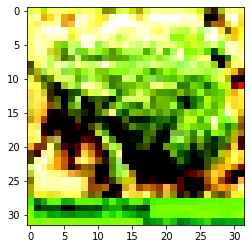

In [ ]:
import matplotlib.pyplot as plt
fig1=plt.figure()
for x,y in train_loader:
  xx=torch.movedim(x[0], (0,1,2), (2,0,1))
  plt.imshow(xx)
  break

In [10]:
import torch.nn
import torch.nn.functional
import torch.optim

In [11]:
class My_net(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = torch.nn.Conv2d(3,9,5)
    self.conv2 = torch.nn.Conv2d(9,15,5)
    self.conv2drop = torch.nn.Dropout2d(p=0.5)
    self.skip_conv2 = torch.nn.Conv2d(3,15,13)
    self.line1 = torch.nn.Linear(375,50)
    self.line2 = torch.nn.Linear(50,10)
    self.resid = torch.nn.Linear(375,10)

  def forward(self, signal):
    #print(signal.shape)
    #singal = torch.nn.BatchNorm2d(3)(signal)
    #residconv = torch.nn.functional.max_pool2d(self.skip_conv2(signal),2)
    #print(residconv.shape)
    signal = torch.nn.functional.relu(torch.nn.functional.max_pool2d(self.conv1(signal),2))
    #print(signal.shape)
    #signal = torch.nn.BatchNorm2d(9)(signal)
    #+residconv+residconv
    signal = torch.nn.functional.relu(torch.nn.functional.max_pool2d(self.conv2drop(self.conv2(signal)),2))
    #print(signal.shape)
    signal = torch.nn.BatchNorm2d(15)(signal)
    signal = signal.view(signal.shape[0],-1)
    #print(signal.shape)
    residual = torch.nn.functional.relu(self.resid(signal))
    signal = torch.nn.functional.relu(self.line1(signal))
    signal = torch.nn.LayerNorm(50)(signal)
    signal = torch.nn.functional.dropout(signal,p=0.5)
    #print(signal.shape)
    #signal += residual
    signal = torch.nn.functional.relu(self.line2(signal)+residual)#
    #print(signal.shape)
    return torch.nn.functional.log_softmax(signal)

In [34]:
train_losses = []
train_counter = []
def train(network, optimizer, epoch):
  network.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()

    #rotator = torchvision.transforms.RandomRotation(degrees=(-10, 10))
    #data = rotator(data)
    #prob=torch.rand(1)
    #if prob[0] > 0.5:
    #  data = torchvision.transforms.Grayscale(num_output_channels=3)(data)
    my_transforms = torch.nn.ModuleList([#torchvision.transforms.ColorJitter(), #useless cause by default is zero
                                         #torchvision.transforms.RandomGrayscale(p=0.2),
                                         #torchvision.transforms.RandomRotation(degrees=(-10, 10)),
                                         #torchvision.transforms.RandomPerspective(),
                                         torchvision.transforms.RandomVerticalFlip(p=0.5)#,
                                         #torchvision.transforms.GaussianBlur(3, sigma=(0.1, 1.0)),
                                         ])
    randtran = torchvision.transforms.RandomApply(transforms=my_transforms, p=0.007)
    data = randtran(data)

    output = network(data)
    loss = torch.nn.functional.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % 100 == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      train_losses.append(loss.item())
      train_counter.append((batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))


In [17]:
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]
def test(network):
  network.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = network(data)
      test_loss += torch.nn.functional.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

In [89]:
import numpy as np

def vote_test(networks):
  for network in networks:
    network.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      outputs =[network(data) for network in networks]
      preds = [output.data.max(1, keepdim=True)[1] for output in outputs]
      final_pred = torch.zeros(test_batch_size,1)
      for i in range(test_batch_size):
        votes = [pred[i][0] for pred in preds]
        vote_result = dict(zip(*np.unique(votes, return_counts=True)))
        final_pred[i][0] = max(vote_result, key=vote_result.get)
        #print(votes)
        #if vote_result.get(max(vote_result, key=vote_result.get)) < 6:
        #  print(vote_result, ' ', final_pred[i][0])
        #break
      #print(preds[0].shape)
      #print(pred.shape)
      #test_loss += torch.nn.functional.nll_loss(output, target, size_average=False).item()
      correct += final_pred.eq(target.data.view_as(final_pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

vote_test(networks)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.



Test set: Avg. loss: 0.0000, Accuracy: 4436/10000 (44%)



In [90]:
networks = [My_net() for i in range(1)]
#network_nonnorm = My_net()
learnin_rate = 0.003
my_momentum = 0.73
optimizers = [torch.optim.SGD(network.parameters(), lr=learnin_rate, momentum=my_momentum) for network in networks]
#for network in networks:
#  optimizer = torch.optim.SGD(network.parameters(), lr=learnin_rate, momentum=my_momentum)
#optimizer_non = torch.optim.SGD(network_nonnorm.parameters(), lr=learnin_rate, momentum=my_momentum)

In [ ]:
for network in networks:
  network(torch.rand(7,3,32,32))

In [93]:
n_epochs=2
net_pairs = zip(networks, optimizers)
for pair in net_pairs:
  for epoch in range(1, n_epochs+1):
    train(pair[0], pair[1], epoch)

for network in networks:
  test(network)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Train Epoch: 1 [0/50000 (0%)]	Loss: 1.560272
Train Epoch: 1 [10000/50000 (20%)]	Loss: 1.701375
Train Epoch: 1 [20000/50000 (40%)]	Loss: 1.573801
Train Epoch: 1 [30000/50000 (60%)]	Loss: 1.506338
Train Epoch: 1 [40000/50000 (80%)]	Loss: 1.584843
Train Epoch: 2 [0/50000 (0%)]	Loss: 1.726188
Train Epoch: 2 [10000/50000 (20%)]	Loss: 1.550326
Train Epoch: 2 [20000/50000 (40%)]	Loss: 1.711092
Train Epoch: 2 [30000/50000 (60%)]	Loss: 1.379437
Train Epoch: 2 [40000/50000 (80%)]	Loss: 1.596608


/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 1.3639, Accuracy: 5174/10000 (52%)



In [21]:
for network in networks:
  test(network)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 1.2969, Accuracy: 5372/10000 (54%)



In [45]:
vote_test(networks)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


[tensor([[5],
        [6],
        [7],
        [0],
        [8],
        [3],
        [7],
        [8],
        [7],
        [4],
        [8],
        [8],
        [8],
        [1],
        [5],
        [8],
        [2],
        [3],
        [6],
        [4],
        [8],
        [7],
        [3],
        [9],
        [6],
        [6],
        [1],
        [8],
        [9],
        [7],
        [0],
        [0],
        [6],
        [8],
        [6],
        [3],
        [1],
        [6],
        [9],
        [1],
        [1],
        [4],
        [0],
        [3],
        [6],
        [6],
        [5],
        [1],
        [4],
        [6],
        [6],
        [6],
        [0],
        [1],
        [3],
        [1],
        [0],
        [8],
        [9],
        [9],
        [0],
        [6],
        [4],
        [4],
        [3],
        [7],
        [6],
        [7],
        [4],
        [3],
        [6],
        [0],
        [2],
        [0],
        [2],
        [4],
        [3]

NameError: ignored